In [33]:

"""
Created on Tue Jul  5 10:13:08 2022

@author: Alexander
"""
#???
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from matplotlib import rc
from matplotlib import ticker
import glob
import os
import skimage.io as skio
from scipy import constants as const
from scipy import stats
import pathlib

In [34]:
def rawdataplespectrum(Datafolder, cropbox): 
    #this function sums the intensity of the ROI and background ROI and writes them 
    #in an array with the wavelength. 
    
    filenames=[]
    os.chdir(Datafolder)
    filenames = glob.glob('*.tif')
    rawspectrum=[]
    backgroundspectrum=[]
    for i in filenames:
        rawspectrum.append(np.mean(skio.imread(i)[cropbox[0]:(cropbox[0]+cropbox[4]), cropbox[1]:(cropbox[1]+cropbox[5])]))
        backgroundspectrum.append(np.mean(skio.imread(i)[cropbox[2]:(cropbox[2]+cropbox[6]), cropbox[3]:(cropbox[3]+cropbox[7])]))
    integratedspectrum=np.array(rawspectrum, dtype='float')-np.array(backgroundspectrum, dtype='float')
    return(integratedspectrum, backgroundspectrum, rawspectrum)

def spectrumfromdistribution(Datafolder, cropbox):
    filenames=[]
    os.chdir(Datafolder)
    filenames = glob.glob('*.tif')
    rawspectrum=[]
    for i, filename in enumerate(filenames):
       spectrum=skio.imread(filename)[cropbox[0]:(cropbox[0]+cropbox[4])
                                      , cropbox[1]:(cropbox[1]+cropbox[5])]

       Zscore=stats.zscore(np.array(spectrum).flatten())
       if i%(50/lambdastep) == 0:
           plt.figure(dpi=150)
           plt.hist(Zscore, density=True, bins=300)
           plt.title(filename)
       a = np.argwhere(Zscore>(np.min(Zscore)+x))
       b=np.argwhere(Zscore<(np.quantile(Zscore,y)))
       c= np.intersect1d(a,b)
       if np.size(c)==0:
            c=np.argwhere(Zscore<(np.quantile(Zscore,z)))
            print('overlap0')
       selected_pixels=np.array(spectrum).flatten()[c]
       mean = np.mean(selected_pixels)
       rawspectrum.append((mean-np.mean(skio.imread(filename)[cropbox[2]:(cropbox[2]+cropbox[6])
                                                              , cropbox[3]:(cropbox[3]+cropbox[7])])))
    return(rawspectrum)   


[23.243763014968295, 28.65635962158933, 30.039882442181465, 31.124878205350797, 32.22321966006723, 33.41728350020435, 61.67225056851851, 43.73551582504024, 54.87633144019435, 52.45312071254045, 76.33781487457759, 119.46693061136978, 270.5143892997222, 689.5160311919999, 1204.935695568521, 1536.6642344009865, 1622.8260489561153, 1655.3552329518016, 1593.5502437603147, 1310.530067884261, 1012.4456630406461, 759.6913694915255, 567.3792910714213, 439.2559082901138, 363.10296826844944, 229.0803837296662, 218.50633422793032]
27


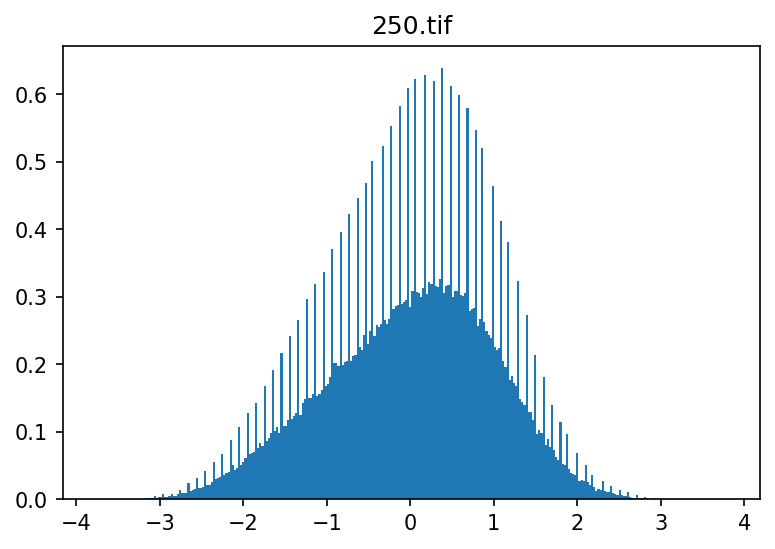

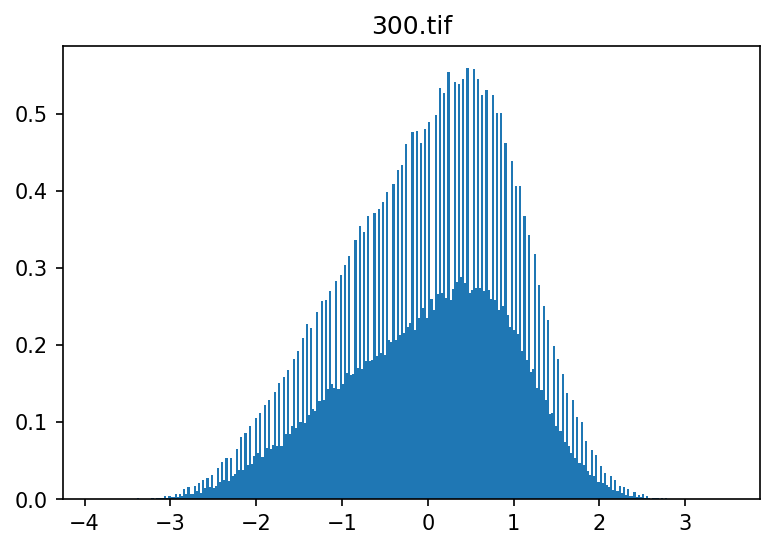

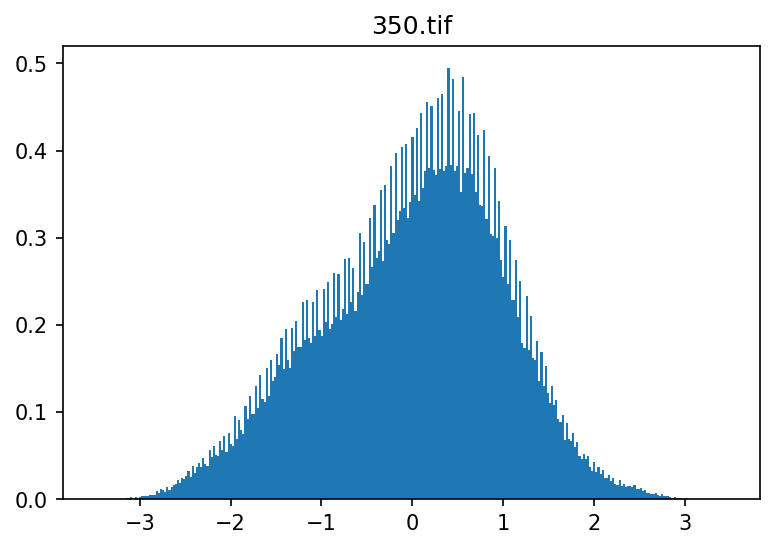

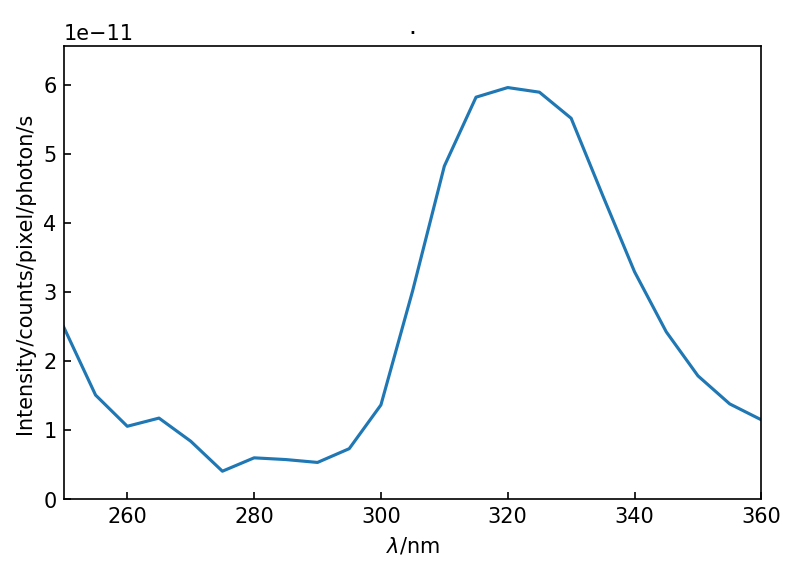

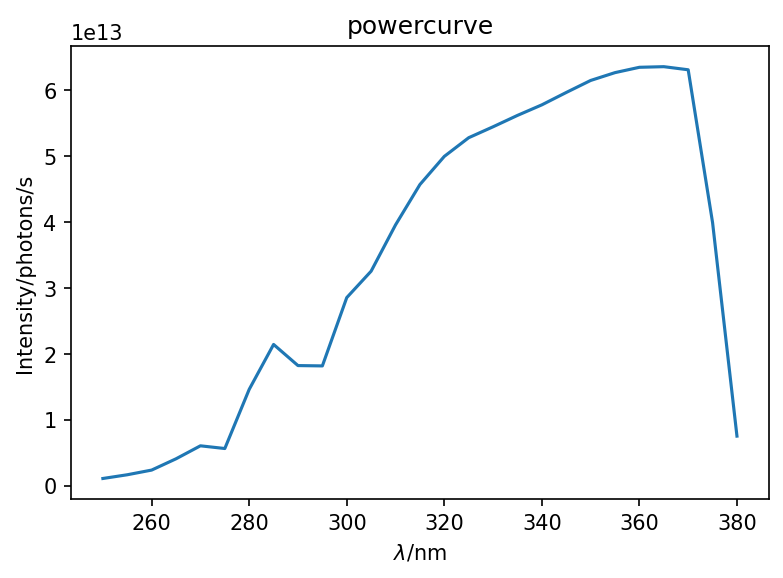

In [35]:



#choose parameters
lambdamin=240
lambdastep=5
integrationtime=0.5
roi_x1=700
roi_y1=750
roi_xbackground=200
roi_ybackground=1200
roi_xwidth=500
roi_ywidth=500
roi_xwidth_background=200
roi_ywidth_background=200
cropbox=[roi_x1,
roi_y1,
roi_xbackground,
roi_ybackground,
roi_xwidth,
roi_ywidth,
roi_xwidth_background,
roi_ywidth_background]


xmin=250
xmax=360
ymin=0
ymax=10**10

x,y,z = 0.5,0.98,0.97

#locations of the ple images and the powermeter measurement
Datafolder= pathlib.Path("__file__").parent
powercurve=np.loadtxt(Datafolder/'Power.txt')


filenames=[]
os.chdir(Datafolder)
filenames = glob.glob('*.tif')
     

    
powercurve=powercurve[powercurve[:,0]>=lambdamin]   
for i in range(len(powercurve)):
    powercurve[i,1]=(powercurve[i,1]*powercurve[i,0]*10**-9)/(const.c * const.h)
    
integratedspectrum=spectrumfromdistribution(Datafolder, cropbox)

print(integratedspectrum)
backgroundspectrum=rawdataplespectrum(Datafolder, cropbox)[1]
rawspectrum=rawdataplespectrum(Datafolder, cropbox)[2]
x=np.linspace(lambdamin, lambdamin + lambdastep*(len(integratedspectrum)-1)
              , len(integratedspectrum))

if len(integratedspectrum) > len(powercurve):
    length=len(powercurve)
else:
    length=len(integratedspectrum) 
s=[]    
#s=np.argwhere(powercurve[i,0]==x[j] for i in range(len(powercurve)) for j in range(len(x)))
for j in range(len(x)):
    s.append(np.argwhere(powercurve[:,0]==x[j]))
integratedspectrum=integratedspectrum[:length]

#print(powercurve)
#this part plots the ple-spectrum
integratedspectrum=integratedspectrum/np.array(powercurve[:length,1])
for i in range(len(integratedspectrum)): 
               integratedspectrum[i] =integratedspectrum[i]/integrationtime
fig1, ax1 = plt.subplots(dpi=150)
x=np.linspace(lambdamin, lambdamin + lambdastep*(len(integratedspectrum)-1)
              , len(integratedspectrum))
plt.plot(x, integratedspectrum  , label='PLE')
plt.xlabel(r'$\lambda$/nm')
plt.ylabel('Intensity/counts/pixel/photon/s')
plt.xlim(xmin, xmax)
#plt.ylim(ymin, ymax)
plt.ylim(0, 1.1*np.max(integratedspectrum[xmin-lambdamin:xmax-lambdamin]))
plt.title(str(Datafolder)[-30:])
plt.tick_params(direction='in')
print(len(integratedspectrum))
plt.figure(dpi=150)
plt.plot(powercurve[:,0],powercurve[:,1])
plt.title("powercurve")
plt.xlabel(r'$\lambda$/nm')
plt.ylabel('Intensity/photons/s')
plt.show()

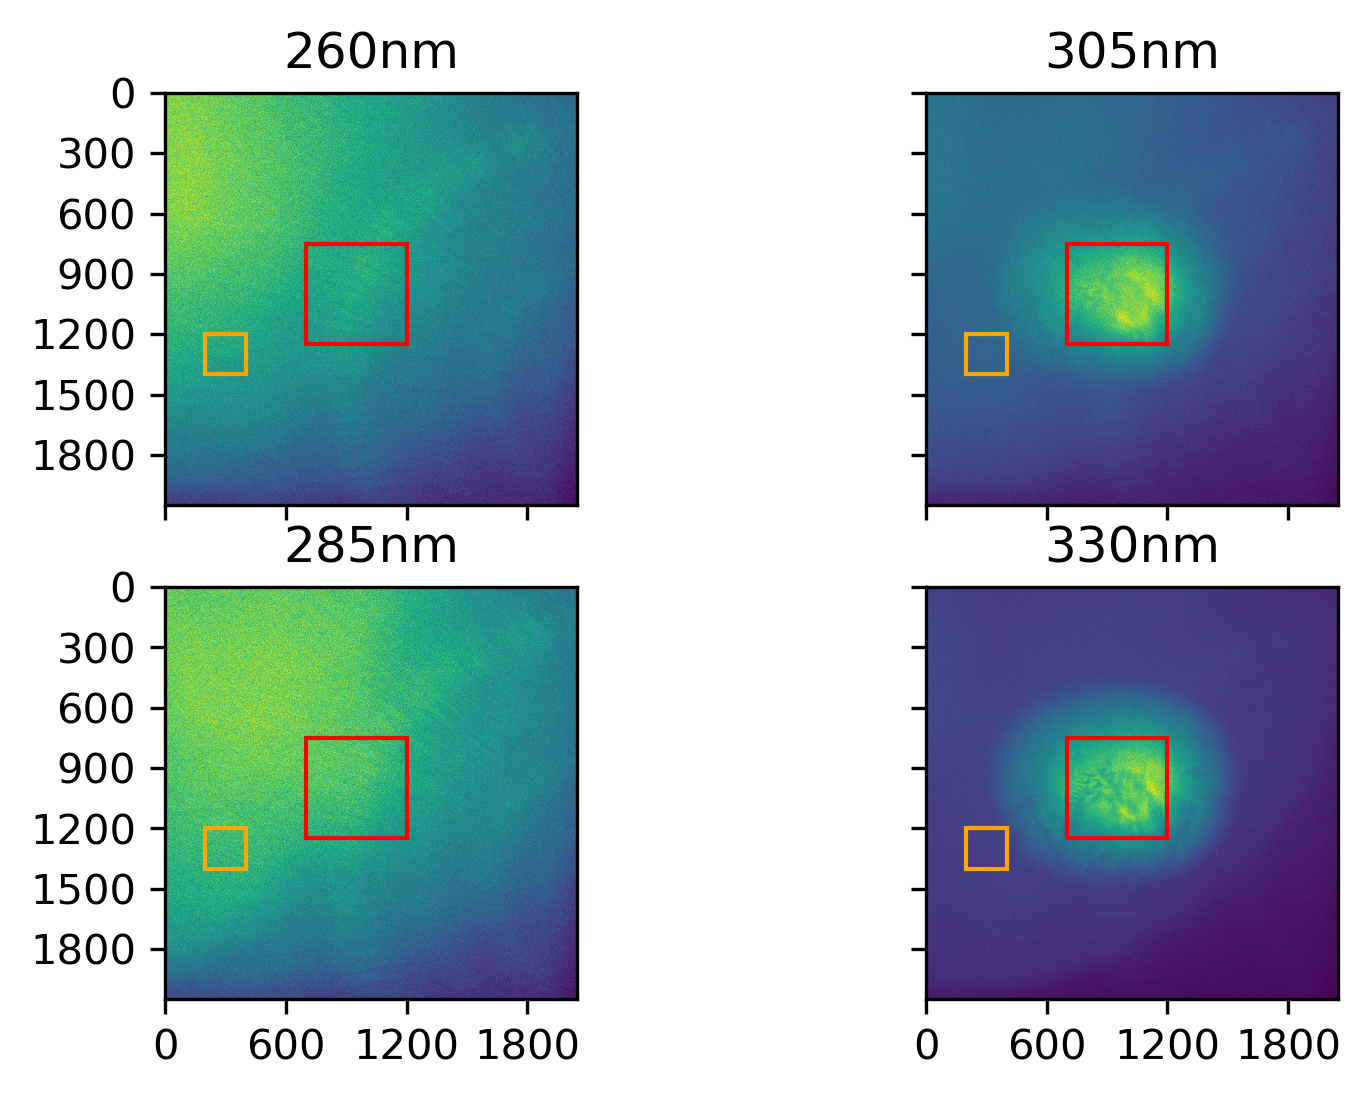

In [36]:
#this parts plots some of the images and shows the ROI (red) and background (orange)
fig, axs = plt.subplots(2, 2, dpi=300)
for i in [0,1]:
    for j in [0,1]:    
        img = mpimg.imread(filenames[int(len(filenames)/6*(1+i+2*j))])
        imgplot = axs[i,j].imshow(img, interpolation='none')
        axs[i,j].set_title(str(lambdamin+int(len(filenames)/6*(1+i+2*j))*lambdastep)+'nm')
        M = 7
        F=4
        yticks = ticker.MaxNLocator(M)
        xticks = ticker.MaxNLocator(F)
        # Set the yaxis major locator using your ticker object. You can also choose the minor
        # tick positions with set_minor_locator.
        axs[i,j].yaxis.set_major_locator(yticks)
        axs[i,j].xaxis.set_major_locator(xticks)
        axs[i,j].add_patch(
             patches.Rectangle(
                (roi_x1,roi_y1),roi_xwidth,roi_ywidth,
                edgecolor = 'red',
                facecolor = 'red',
                fill=False) )
        axs[i,j].add_patch(
             patches.Rectangle(
                (roi_xbackground,roi_ybackground),roi_xwidth_background
                ,roi_ywidth_background,
                edgecolor = 'orange',
                facecolor = 'red',
                fill=False) )
for ax in axs.flat:
    ax.label_outer()